In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
from matplotlib.animation import FuncAnimation
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from shapely.ops import unary_union
from shapely.geometry import Point

C:\Users\phamq\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
BIG_DATA_PREPROCESSING_PATH = "G:/Big_Data_Preprocessing"
EXPORTATION_PATH = f"{BIG_DATA_PREPROCESSING_PATH}/Air/Concentration/Exportation"
CALIBRATION_PATH = f"{BIG_DATA_PREPROCESSING_PATH}/Air/Concentration/Calibration"
data_path = fr'{EXPORTATION_PATH}/Result/9_NetCDF_Dataset'
file_path = f'{data_path}/EMC_Report_26th.nc'
ds = nc.Dataset(file_path, 'r')
month_number = 3; month_name = "March"; year = 2023
lon_min = -125
lon_max = -116
lat_min = 41.9
lat_max = 46.3
lat = ds.variables['latitude'][0, :, :]
lon = ds.variables['longitude'][0, :, :]
pm25 = ds.variables['PM25'][:]
wdir = ds.variables['WDIR'][:]
wspd = ds.variables['WSPEED'][:]
time = ds.variables['time'][:]

shapefile_path = f"{EXPORTATION_PATH}/Result/0_Initial_Data/Shapefile/OREGON_SHAPEFILES/reprojected_orcntypoly.shp"
gdf = gpd.read_file(shapefile_path)
target_crs = "EPSG:4326"
gdf = gdf.to_crs(target_crs)
minx, miny, maxx, maxy = gdf.total_bounds
expansion_distance = 0.015  # degrees
expanded_geometries = [geom.buffer(expansion_distance) for geom in gdf.geometry]
expanded_boundary = unary_union(expanded_geometries)
mask = np.zeros(lat.shape, dtype=bool)
for i in range(lat.shape[0]):
    for j in range(lat.shape[1]):
        test_point = Point(lon[i, j], lat[i, j])
        if expanded_boundary.contains(test_point):
            mask[i, j] = True
filtered_pm25 = np.full(pm25.shape, np.nan)
filtered_wdir = np.full(wdir.shape, np.nan)
filtered_wspd = np.full(wspd.shape, np.nan)
for t in range(pm25.shape[0]):
    filtered_pm25[t, mask] = pm25[t, mask]
    filtered_wdir[t, mask] = wdir[t, mask]
    filtered_wspd[t, mask] = wspd[t, mask]


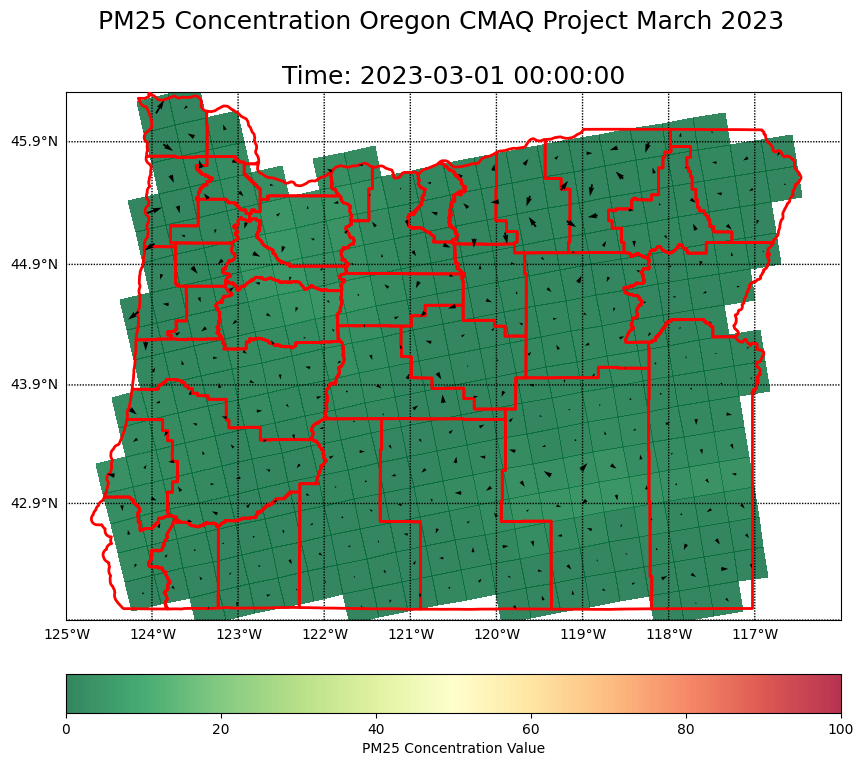

In [7]:
time_units = ds.variables['time'].units
time_calendar = ds.variables['time'].calendar
time_format = nc.num2date(time, units=time_units, calendar=time_calendar)
fig, ax = plt.subplots(figsize=(10, 14))
m = Basemap(projection='merc', llcrnrlon=lon_min, urcrnrlon=lon_max,
            llcrnrlat=lat_min, urcrnrlat=lat_max, resolution='i', ax=ax)
m.drawparallels(np.arange(lat_min, lat_max, 1), labels=[1,0,0,0])
m.drawmeridians(np.arange(lon_min, lon_max, 1), labels=[0,0,0,1])
lon_proj, lat_proj = m(lon, lat)
pm25_plot = m.pcolormesh(lon_proj, lat_proj, filtered_pm25[0, :, :], cmap='RdYlGn_r',
                         shading='auto', alpha=0.8, vmin=0, vmax=100)
quiver = m.quiver(lon_proj, lat_proj, filtered_wspd[0, :, :] * np.cos(filtered_wdir[0, :, :]),
                  filtered_wspd[0, :, :] * np.sin(filtered_wdir[0, :, :]), color='black', zorder=30)
cbar = plt.colorbar(pm25_plot, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('PM25 Concentration Value')
title = ax.set_title('')
fig.suptitle(f'PM25 Concentration Oregon CMAQ Project {month_name} {year}', fontsize=18, y=0.7)
title = plt.title(f'Time: {time_format[0]}', fontsize=18)
m.readshapefile(shapefile_path[:-4], shapefile_path.split('/')[-1][:-4], color='red', linewidth=2, zorder=20)
plt.show()

In [9]:
def update(frame):
    pm25_plot.set_array(filtered_pm25[frame, :, :].flatten())
    quiver.set_UVC(filtered_wspd[frame, :, :] * np.sin(filtered_wdir[frame, :, :]),
                   filtered_wspd[frame, :, :] * np.cos(filtered_wdir[frame, :, :]))
    title.set_text(f'Time: {time_format[frame]}')
    print(time_format[frame])

    return pm25_plot, quiver, title

ani = FuncAnimation(fig, update, frames=len(time_format), blit=False)
ani.save(f'{EXPORTATION_PATH}/Result/10_Video/PM25_wind_animation.mp4', writer='ffmpeg', fps=10)
plt.show()

2023-03-01 00:00:00
2023-03-01 00:00:00
2023-03-01 01:00:00
2023-03-01 02:00:00
2023-03-01 03:00:00
2023-03-01 04:00:00
2023-03-01 05:00:00
2023-03-01 06:00:00
2023-03-01 07:00:00
2023-03-01 08:00:00
2023-03-01 09:00:00
2023-03-01 10:00:00
2023-03-01 11:00:00
2023-03-01 12:00:00
2023-03-01 13:00:00
2023-03-01 14:00:00
2023-03-01 15:00:00
2023-03-01 16:00:00
2023-03-01 17:00:00
2023-03-01 18:00:00
2023-03-01 19:00:00
2023-03-01 20:00:00
2023-03-01 21:00:00
2023-03-01 22:00:00
2023-03-01 23:00:00
2023-03-02 00:00:00
2023-03-02 01:00:00
2023-03-02 02:00:00
2023-03-02 03:00:00
2023-03-02 04:00:00
2023-03-02 05:00:00
2023-03-02 06:00:00
2023-03-02 07:00:00
2023-03-02 08:00:00
2023-03-02 09:00:00
2023-03-02 10:00:00
2023-03-02 11:00:00
2023-03-02 12:00:00
2023-03-02 13:00:00
2023-03-02 14:00:00
2023-03-02 15:00:00
2023-03-02 16:00:00
2023-03-02 17:00:00
2023-03-02 18:00:00
2023-03-02 19:00:00
2023-03-02 20:00:00
2023-03-02 21:00:00
2023-03-02 22:00:00
2023-03-02 23:00:00
2023-03-03 00:00:00
